# Exploratory Data Analysis

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Read in data**

In [2]:
dailyData = pd.read_csv('C:/Users/Jenny/Desktop/UOP-MSDS/2020Spring/ANLT_210_SoftwareMethods/Bikeshare/Data/daily.csv')
hourlyData = pd.read_csv('C:/Users/Jenny/Desktop/UOP-MSDS/2020Spring/ANLT_210_SoftwareMethods/Bikeshare/Data/hourly.csv')

In [3]:
dailyData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
dailyData.shape

(731, 16)

In [5]:
hourlyData.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [6]:
hourlyData.shape

(17379, 17)

## Funtions
**Split the data set to train and test sets**

The split will be 80% for train and 20% for test.

In [7]:
def splitData(x, y):
    # split data to X_train, X_test, y_train, y_test:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    
    return X_train, X_test, y_train, y_test

**Normalize**

The data set is normalized using StandardScaler from sklearns.

In [8]:
def normData(X_train, X_test):
    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test

In [9]:
lm = LinearRegression()

# Daily Data
## Preprocessing Data

Set 'cnt' to y. 'cnt' is our y values (the predictor values).

'instant' is just numbering each data input. 'dteday' is just the date, which is already broken down enough in the month and year features. 'casual' and 'registered' are the split totals of 'cnt'. 'cnt' is our y values. Because of this, 'dteday', 'casual', 'registered' and 'cnt' are removed for x.

In [10]:
x = dailyData.drop(['instant', 'dteday', 'casual', 'registered', 'cnt'], axis = 1)
y = dailyData['cnt']

In [11]:
dailyX_train, dailyX_test, dailyy_train, dailyy_test = splitData(x, y)
dailyX_train, dailyX_test = normData(dailyX_train, dailyX_test)

## (Multiple) Linear Regression

In [12]:
dailyModel = lm.fit(dailyX_train, dailyy_train)

In [13]:
dailyPred = lm.predict(dailyX_test)

In [14]:
dailyPred[0:5]

array([5130.10216329, 5425.6746631 , 1741.37634758, 1207.85924803,
       4144.12467348])

In [15]:
lm.score(dailyX_test, dailyy_test)

0.8045560823654135

In [16]:
lm.coef_

array([ 515.39364201,  987.18286795, -106.0799291 ,  -61.24524325,
        146.48904769,   34.24859269, -279.8601117 ,  480.20951949,
        503.60969782, -184.00314884, -219.83609509])

In [17]:
lm.intercept_

4495.287671232877

Using the remaining features, 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum' and 'windspeed', the Multiple Linear Regression model gives a **80.4%** score to predict total bike rental counts.

*lm.coef_* gives us the coefficients for each remaining feature, respectively.

*lm.intercept_* gives us the intercepct of the multiple linear model.

## Plotting linear regresssion with highest correlation

In [18]:
dailyCorr = dailyData.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)
dCorr = abs(dailyCorr.corr(method = 'pearson')['cnt'])
dCorr = dCorr.drop(['cnt'])
dSortCorr = (dCorr[~np.isnan(dCorr)]).sort_values(ascending = False)

In [19]:
dSortCorr

atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
weathersit    0.297391
mnth          0.279977
windspeed     0.234545
hum           0.100659
holiday       0.068348
weekday       0.067443
workingday    0.061156
Name: cnt, dtype: float64

In [20]:
x1 = dailyData['atemp']
y1 = dailyData['cnt']

In [21]:
dailyLRX_train, dailyLRX_test, dailyLRy_train, dailyLRy_test = splitData(x1, y1)

In [22]:
dailyLRX_train = np.array(dailyLRX_train).reshape(-1, 1)
dailyLRX_test = np.array(dailyLRX_test).reshape(-1, 1)
lm.fit(dailyLRX_train, dailyLRy_train)
dailyLRy_pred = lm.predict(dailyLRX_test)

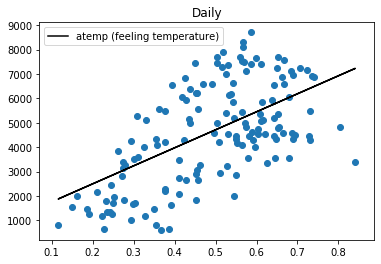

In [35]:
plt.scatter(dailyLRX_test, dailyLRy_test)
plt.plot(dailyLRX_test, dailyLRy_pred, color = 'black', label = 'atemp (feeling temperature)')
plt.title('Daily')
plt.legend()
plt.show()

'atemp' gave the higest correlation of 0.631.

# Hourly Data
## Preprocessing Data

In [24]:
x2 = hourlyData.drop(['instant', 'dteday', 'hr', 'casual', 'registered', 'cnt'], axis = 1)
y2 = hourlyData['cnt']

In [25]:
hourlyX_train, hourlyX_test, hourlyy_train, hourlyy_test = splitData(x2, y2)
hourlyX_train, hourlyX_test = normData(hourlyX_train, hourlyX_test)

## (Multiple) Linear Regression

In [26]:
hourlyModel = lm.fit(hourlyX_train, hourlyy_train)
hourlyPred = lm.predict(hourlyX_test)
lm.score(hourlyX_test, hourlyy_test)

0.33086357832541047

In [27]:
lm.coef_

array([ 20.30843316,  38.2985138 ,   3.30698064,  -4.03895817,
         2.90974873,   1.68761671,   3.03575301,   8.88067923,
        52.82627545, -53.17380719,   9.00375872])

In [28]:
lm.intercept_

189.26332446234622

Performing Multiple Linear Regression on the hourly data set gives a worser score. Using the remaining features, 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum' and 'windspeed', the Multiple Linear Regression model gives a **33.1%** score to predict total bike rental counts.

*lm.coef_* gives us the coefficients for each remaining feature, respectively.

*lm.intercept_* gives us the intercepct of the multiple linear model.



## Plotting linear regresssion with highest correlation

In [29]:
hourlyCorr = hourlyData.drop(['instant', 'dteday', 'hr', 'casual', 'registered'], axis = 1)
hCorr = abs(hourlyCorr.corr(method = 'pearson')['cnt'])
hCorr = hCorr.drop(['cnt'])
hSortCorr = (hCorr[~np.isnan(dCorr)]).sort_values(ascending = False)

In [30]:
hSortCorr

temp          0.404772
atemp         0.400929
hum           0.322911
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

In [31]:
x3 = hourlyData['temp']
y3 = hourlyData['cnt']

In [32]:
hourlyLRX_train, hourlyLRX_test, hourlyLRy_train, hourlyLRy_test = splitData(x3, y3)

In [33]:
hourlyLRX_train = np.array(hourlyLRX_train).reshape(-1, 1)
hourlyLRX_test = np.array(hourlyLRX_test).reshape(-1, 1)
lm.fit(hourlyLRX_train, hourlyLRy_train)
hourlyLRy_pred = lm.predict(hourlyLRX_test)

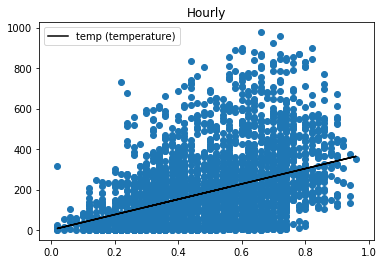

In [36]:
plt.scatter(hourlyLRX_test, hourlyLRy_test)
plt.plot(hourlyLRX_test, hourlyLRy_pred, color = 'black', label = 'temp (temperature)')
plt.title('Hourly')
plt.legend()
plt.show()

'temp' gave the highest correlation of 0.405, which explains the poor plot.